In [1]:
import os 
os.chdir('../../')
import pandas as pd
import matplotlib.pyplot as plt
from epigraphhub.data.foph import get_georegion_data
from epigraphhub.models.forecast_swiss import train_single_canton, forecast_single_canton
from sklearn.metrics import (mean_absolute_error as mae, mean_squared_error as mse, mean_squared_log_error as msle,
                             mean_absolute_percentage_error as mape)

In [2]:
def plot_forecast(target_name, canton, df_for):
    
    dict_name = {'hosp': ['New hospitalizations', 'datum', 'entries', 'foph_hosp_d'],
                'total_hosp': ['Total Hospitalizations', 'date', 'total_covid19patients', 'foph_hospcapacity_d'], 
                'icu_patients': ['Total ICU patients', 'date', 'icu_covid19patients', 'foph_hospcapacity_d']}
    
    title = f'Forecast {dict_name[target_name][0]} in {canton}'
    
    df = get_georegion_data('switzerland', dict_name[target_name][-1], [canton], columns = [dict_name[target_name][1], 'georegion', dict_name[target_name][2]], georegion_column = 'georegion')
    df.set_index(dict_name[target_name][1], inplace = True)
    df = df.sort_index()
    df.index = pd.to_datetime(df.index)
    
    df = df.resample("D").mean()
    
    plt.figure()
    
    plt.plot(df.loc[df_for.index][dict_name[target_name][2]], label = 'Data', color = 'black')
    
    plt.plot(df_for['median'], label = 'Median', color = 'tab:orange')
    
    plt.fill_between(df_for.index, df_for.upper, df_for.lower, color = 'tab:orange', alpha = 0.5)
    
    plt.xlabel('Date')
    plt.ylabel('Incidence')
    
    plt.title(title)
    plt.xticks(rotation=25)
    plt.legend()
    plt.grid()
    plt.savefig(f'./examples/forecast_switzerland/plots/forecast_{target_name}_{canton}.png', bbox_inches='tight')
    plt.show()
    
    # computing some metrics 
    df_metrics = pd.DataFrame(columns = ['metrics', 'forecast_error'] )
    
    metrics = ['mean_absolute_error',
               'mean_squared_error', 'root_mean_squared_error', 'mean_squared_log_error',
                'mean_absolute_percentage_error']
    
    df_metrics['metrics'] = metrics 
    
    y_true = df.loc[df_for.index][dict_name[target_name][2]]
    
    y_for = df_for['median']
    
    df_metrics['forecast_error'] = [ 
                                mae(y_true, y_for),
                                mse(y_true, y_for),
                                mse(y_true, y_for, squared = False),
                                msle(y_true, y_for),
                                mape(y_true, y_for) ]
    
    df_metrics.to_csv(f'./examples/forecast_switzerland/metrics/for_metrics_{target_name}_{canton}')
    
    return df_metrics 
    

In [3]:
def train_forecast(target_curve_name = 'hosp', canton = 'GE',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d'],
                    path = './examples/forecast_switzerland/saved_models'):
    
    train_single_canton(
    target_curve_name,
    canton,
    predictors,
    path = path,
    ini_date="2020-05-01",
    end_date = '2022-05-01')
    
    df_for = forecast_single_canton(
    target_curve_name,
    canton,
    predictors,
    end_date = '2022-05-01', 
    path=path)
    
    df_m = plot_forecast(target_curve_name, canton, df_for)
    
    df_m.set_index('metrics', inplace = True)
    
    return df_for, df_m  
    
    

## New hospitalizations 

### Geneva

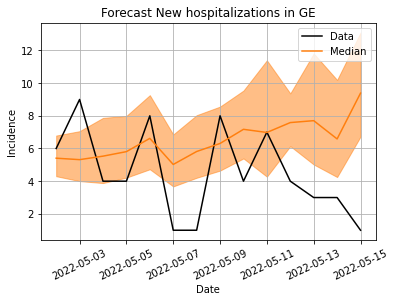

CPU times: user 24.3 s, sys: 399 ms, total: 24.7 s
Wall time: 58.9 s


,lower,median,upper
date,,,
2022-05-02,4.305113,5.407375,6.791856
2022-05-03,4.005949,5.317914,7.059553
2022-05-04,3.886562,5.531686,7.873166
2022-05-05,4.220003,5.808106,7.993856
2022-05-06,4.730414,6.619394,9.262694


In [4]:
%%time

df_f, df_m = train_forecast(target_curve_name = 'hosp', canton = 'GE',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d'])

df_f.head()

In [5]:
df_m.head()

,forecast_error
metrics,
mean_absolute_error,3.069897
mean_squared_error,13.707551
root_mean_squared_error,3.702371
mean_squared_log_error,0.531191
mean_absolute_percentage_error,1.671991


### Berna

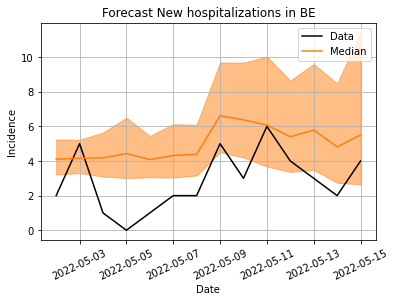

,lower,median,upper
date,,,
2022-05-02,3.215194,4.106516,5.244932
2022-05-03,3.303045,4.155102,5.226956
2022-05-04,3.099691,4.182870,5.644563
2022-05-05,3.011049,4.425015,6.502970
2022-05-06,3.058025,4.082189,5.449356


In [6]:
df_f, df_m = train_forecast(target_curve_name = 'hosp', canton = 'BE',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d'])

df_f.head()

In [7]:
df_m.head()

,forecast_error
metrics,
mean_absolute_error,2.279628e+00
mean_squared_error,6.382395e+00
root_mean_squared_error,2.526340e+00
mean_squared_log_error,4.922571e-01
mean_absolute_percentage_error,1.423464e+15


### Zurich

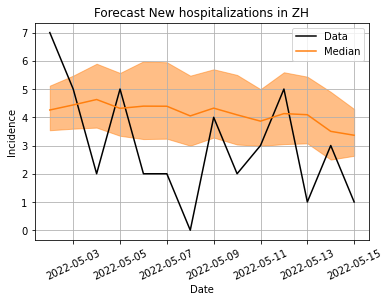

,lower,median,upper
date,,,
2022-05-02,3.541208,4.257735,5.119244
2022-05-03,3.596174,4.436925,5.474236
2022-05-04,3.634754,4.629238,5.895817
2022-05-05,3.345000,4.315855,5.568491
2022-05-06,3.228379,4.394307,5.981310


In [8]:
df_f, df_m = train_forecast(target_curve_name = 'hosp', canton = 'ZH',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d'])

df_f.head()

In [9]:
df_m.head()

,forecast_error
metrics,
mean_absolute_error,1.825094e+00
mean_squared_error,4.600587e+00
root_mean_squared_error,2.144898e+00
mean_squared_log_error,4.104828e-01
mean_absolute_percentage_error,1.302378e+15


## Total hospitalizations 

### Geneva 

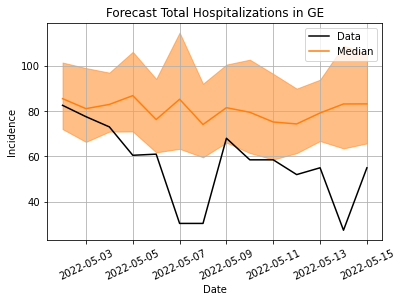

,lower,median,upper
date,,,
2022-05-02,72.025220,85.433437,101.337729
2022-05-03,66.387185,81.031123,98.905277
2022-05-04,70.915340,82.890536,96.887937
2022-05-05,70.981996,86.763308,106.053253
2022-05-06,61.769973,76.248224,94.120029


In [10]:
df_f, df_m = train_forecast(target_curve_name = 'total_hosp', canton = 'GE',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'])

df_f.head()

In [11]:
df_m.head()

,forecast_error
metrics,
mean_absolute_error,24.091576
mean_squared_error,841.770364
root_mean_squared_error,29.013279
mean_squared_log_error,0.266555
mean_absolute_percentage_error,0.597287


### Berna 

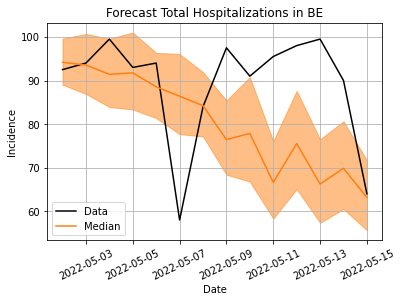

,lower,median,upper
date,,,
2022-05-02,89.039058,94.172257,99.601391
2022-05-03,86.914053,93.544744,100.681293
2022-05-04,83.923300,91.416721,99.579222
2022-05-05,83.361080,91.755633,100.995527
2022-05-06,81.384761,88.550334,96.346804


In [12]:
df_f, df_m = train_forecast(target_curve_name = 'total_hosp', canton = 'BE',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'])

df_f.head()

In [13]:
df_m.head()

,forecast_error
metrics,
mean_absolute_error,13.232830
mean_squared_error,312.249928
root_mean_squared_error,17.670595
mean_squared_log_error,0.047405
mean_absolute_percentage_error,0.152175


### Zurich 

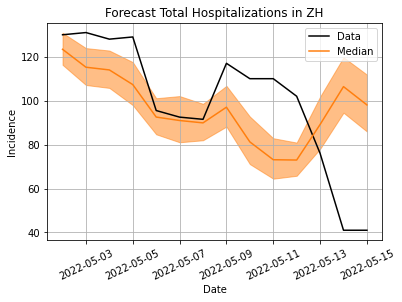

,lower,median,upper
date,,,
2022-05-02,116.315952,123.382796,130.878990
2022-05-03,107.125781,115.219224,123.924133
2022-05-04,105.799545,113.986495,122.806966
2022-05-05,97.964756,107.308089,117.542537
2022-05-06,84.679591,92.527719,101.103214


In [14]:
df_f, df_m = train_forecast(target_curve_name = 'total_hosp', canton = 'ZH',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'])

df_f.head()

## ICU patients 

### Geneva

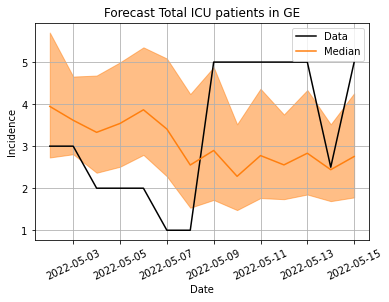

,lower,median,upper
date,,,
2022-05-02,2.730771,3.946134,5.702410
2022-05-03,2.808240,3.615731,4.655410
2022-05-04,2.368102,3.328797,4.679228
2022-05-05,2.510586,3.540560,4.993082
2022-05-06,2.792635,3.865415,5.350301


In [15]:
df_f, df_m = train_forecast(target_curve_name = 'icu_patients', canton = 'GE',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'])

df_f.head()

In [16]:
df_m.head()

,forecast_error
metrics,
mean_absolute_error,1.729909
mean_squared_error,3.541181
root_mean_squared_error,1.881802
mean_squared_log_error,0.215673
mean_absolute_percentage_error,0.689398


### Berna 

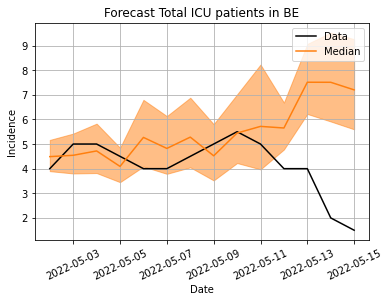

,lower,median,upper
date,,,
2022-05-02,3.898964,4.488602,5.167411
2022-05-03,3.805264,4.543043,5.423866
2022-05-04,3.821849,4.719542,5.828088
2022-05-05,3.451851,4.091229,4.849036
2022-05-06,4.086860,5.269123,6.793398


In [17]:
df_f, df_m = train_forecast(target_curve_name = 'icu_patients', canton = 'BE',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'])

df_f.head()

In [18]:
df_m.head()

,forecast_error
metrics,
mean_absolute_error,1.580069
mean_squared_error,5.869754
root_mean_squared_error,2.422757
mean_squared_log_error,0.213996
mean_absolute_percentage_error,0.653443


### Zurich 

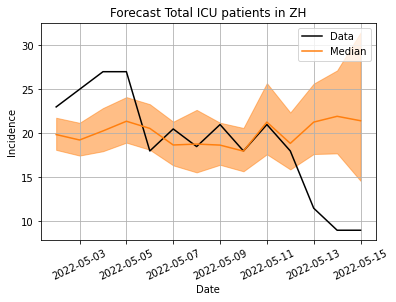

,lower,median,upper
date,,,
2022-05-02,18.124751,19.863828,21.769770
2022-05-03,17.478036,19.246731,21.194410
2022-05-04,17.973903,20.274333,22.869189
2022-05-05,18.947013,21.374570,24.113154
2022-05-06,18.137809,20.561446,23.308939


In [19]:
df_f, df_m = train_forecast(target_curve_name = 'icu_patients', canton = 'ZH',
                    predictors = ['foph_test_d', 'foph_cases_d', 'foph_hosp_d', 'foph_hospcapacity_d'])

df_f.head()

In [20]:
df_m.head()

,forecast_error
metrics,
mean_absolute_error,4.610170
mean_squared_error,39.536917
root_mean_squared_error,6.287839
mean_squared_log_error,0.137310
mean_absolute_percentage_error,0.350888
